In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1635


<Axes: xlabel='Time'>

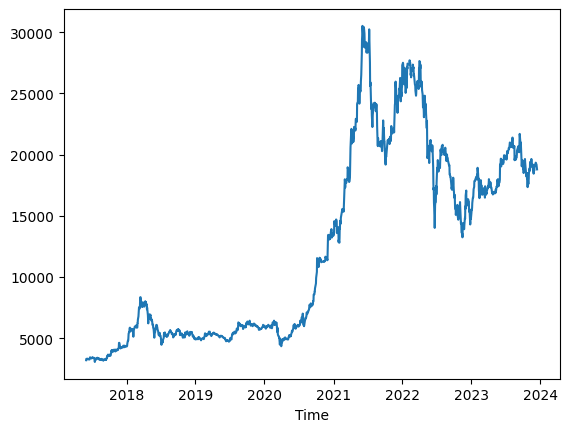

In [2]:
#2. Fetch data and visualize
VIB = stock_historical_data(symbol = "VIB", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VIB['Close']))
VIB
VIB["Close"].plot()

In [3]:
VIB['Lag'] = np.arange(len(VIB.index))
VIB = VIB[['Close', 'Lag']]
VIB

VIB = pd.DataFrame(VIB)
VIB.set_index("Lag", inplace= True)
VIB

,Close
Lag,
0,3210
1,3320
2,3290
3,3320
4,3340
...,...
1630,19200
1631,19200
1632,19050


In [4]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.8 * len(VIB))
test_size = int(0.2 * len(VIB))

train_data = VIB[:train_size]
test_data = VIB[train_size:]

In [5]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [6]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[22877.42392996],
       [22895.50285135],
       [22913.58177274],
       [22931.66069414],
       [22949.73961553],
       [22967.81853693],
       [22985.89745832],
       [23003.97637971],
       [23022.05530111],
       [23040.1342225 ],
       [23058.21314389],
       [23076.29206529],
       [23094.37098668],
       [23112.44990808],
       [23130.52882947],
       [23148.60775086],
       [23166.68667226],
       [23184.76559365],
       [23202.84451505],
       [23220.92343644],
       [23239.00235783],
       [23257.08127923],
       [23275.16020062],
       [23293.23912201],
       [23311.31804341],
       [23329.3969648 ],
       [23347.4758862 ],
       [23365.55480759],
       [23383.63372898],
       [23401.71265038],
       [23419.79157177],
       [23437.87049317],
       [23455.94941456],
       [23474.02833595],
       [23492.10725735],
       [23510.18617874],
       [23528.26510013],
       [23546.34402153],
       [23564.42294292],
       [23582.50186432],


In [7]:
# 6. 60 days prediction
last_index =  VIB.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[28789.23122575]
 [28807.31014714]
 [28825.38906854]
 [28843.46798993]
 [28861.54691132]
 [28879.62583272]
 [28897.70475411]
 [28915.7836755 ]
 [28933.8625969 ]
 [28951.94151829]
 [28970.02043969]
 [28988.09936108]
 [29006.17828247]
 [29024.25720387]
 [29042.33612526]
 [29060.41504666]
 [29078.49396805]
 [29096.57288944]
 [29114.65181084]
 [29132.73073223]
 [29150.80965362]
 [29168.88857502]
 [29186.96749641]
 [29205.04641781]
 [29223.1253392 ]
 [29241.20426059]
 [29259.28318199]
 [29277.36210338]
 [29295.44102478]
 [29313.51994617]
 [29331.59886756]
 [29349.67778896]
 [29367.75671035]
 [29385.83563175]
 [29403.91455314]
 [29421.99347453]
 [29440.07239593]
 [29458.15131732]
 [29476.23023871]
 [29494.30916011]
 [29512.3880815 ]
 [29530.4670029 ]
 [29548.54592429]
 [29566.62484568]
 [29584.70376708]
 [29602.78268847]
 [29620.86160987]
 [29638.94053126]
 [29657.01945265]
 [29675.09837405]
 [29693.17729544]
 [29711.25621683]
 [29729.33513823]

In [10]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

def MSLE (pred, actual):
    return np.mean((np.log(1+actual)-np.log(1+pred))*(np.log(1+actual)-np.log(1+pred)))
print("MSLR: ", MSLE(y_pred, y_test))

Testing RMSE: 8020.618721483534
Testing MAPE: 44.99334992086972
Testing MAE: 7901.84469207853
MSLR:  0.1416478078493836


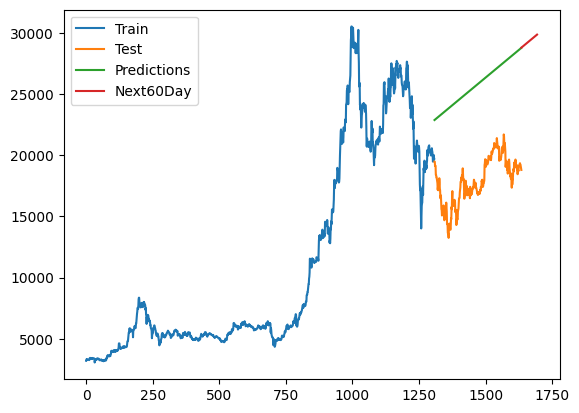

In [9]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()